# **Regression Trees**


Estimated time needed: **30** minutes


In this exercise session you will use a real dataset to train a regression tree model. The dataset includes information about taxi tip and was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). You will use the trained model to predict the amount of tip paid. 



## Objectives


After completing this lab you will be able to:


* Perform basic data preprocessing using Scikit-Learn
* Model a regression task using Scikit-Learn
* Train a Decision Tree Regressor model
* Run inference and assess the quality of the trained models


<h2>Introduction</h2>
The dataset used in this exercise session is a subset of the publicly available <a><href='https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page'>TLC Dataset</a> (all rights reserved by Taxi & Limousine Commission (TLC), City of New York). The prediction of the tip amount can be modeled as a regression problem. To train the model you can use part of the input dataset and the remaining data can be used to assess the quality of the trained model.
    <br>
</div>


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


Make sure the libraries required are available by executing the cell below.


Import the libraries we need to use in this lab


In [5]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


In this section you will read the dataset in a Pandas dataframe and visualize its content. You will also look at some data statistics.

Note: A Pandas dataframe is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure. For more information: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.


In [6]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


Each row in the dataset represents a taxi trip. As shown above, each row has 13 variables. One of the variables is `tip_amount` which will be the target variable. Your objective will be to train a model that uses the other variables to predict the value of the `tip_amount` variable.


To understand the dataset a little better, let us plot the correlation of the target variable against the input variables.


<Axes: >

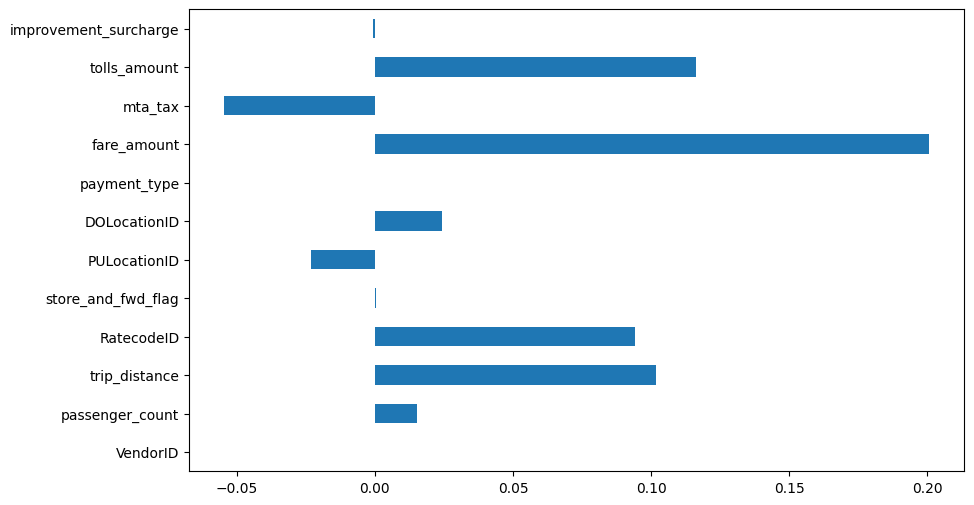

In [7]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

This shows us that the input features `payment_type`, `VendorID`, `store_and_fwd_flag` and `improvement_surcharge` have little to no correlation with the target variable.


<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


You will now prepare the data for training by applying normalization to the input features.


In [8]:
# extract the labels from the dataframe
y = raw_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = raw_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div id="dt_sklearn">
    <h2>Build a Decision Tree Regressor model with Scikit-Learn</h2>
</div>


Regression Trees are implemented using `DecisionTreeRegressor`.

The important parameters of the model are:

`criterion`: The function used to measure error, we use 'squared_error'.

`max_depth` - The maximum depth the tree is allowed to take; we use 8.


In [10]:
# import the Decision Tree Regression Model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

Now lets train our model using the `fit` method on the `DecisionTreeRegressor` object providing our training data


In [11]:
dt_reg.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",35
,"max_leaf

<div id="dt_sklearn_snapml">
    <h2>Evaluate the Scikit-Learn and Snap ML Decision Tree Regressor Models</h2>
</div>


To evaluate our dataset we will use the `score` method of the `DecisionTreeRegressor` object providing our testing data, this number is the $R^2$ value which indicates the coefficient of determination. We will also evaluate the Mean Squared Error $(MSE)$ of the regression output with respect to the test set target values. High $R^2$ and low $MSE$ values are expected from a good regression model.


In [12]:
# run inference using the sklearn model
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028


## Practice


Q1. What if we change the max_depth to 12? How would the $MSE$ and $R^2$ be affected? 


MSE is noted to be increased by increasing the max_depth of the tree. This may be because of the model having excessive parameters due to which it overfits to the training data, making the performance on the testing data poorer. Another important observation would be that the model gives a <b>negative</b> value of $R^2$. This again indicates that the prediction model created does a very poor job of predicting the values on a test set.
</details>

Q2. Identify the top 3 features with the most effect on the `tip_amount`.


In [16]:
   
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
abs(correlation_values).sort_values(ascending=False)[:3]


fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

Q3. Since we identified 4 features which are not correlated with the target variable, try removing these variables from the input set and see the effect on the $MSE$ and $R^2$ value.


In [ ]:
raw_data = raw_data.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)

Q4. Check the effect of **decreasing** the `max_depth` parameter to 4 on the $MSE$ and $R^2$ values.


You will note that the MSE value decreases and $R^2$ value increases, meaning that the choice of `max_depth=4` may be more suited for this dataset.
</details>